# CVDPM-19

We as a team (Vidhya Subramaniam, Priyank, Karthik, Devleena and Mack) have built this Report

### Organization of this document

<blockquote>
    <ol>
        <li>Importing the necessary libraries</li>
        <li>Import the data directly from JSON File using covid19india.org API file</li>
        <li>High level understanding of the data</li>
        <li>Converting the count data to type numeric</li>
        <li>Manipulating the date column for Analysis</li>
        <li>Converting the 'Date Column' to 'Datetime'</li>
        <li>Verify if all the datatype conversions are in place.</li>
        <li>Analysing the number of Daily Confirmed Patients' data</li>
        <li>Plotting the Daily confirmed patients using Line plot</li>
        <li>Analysing the number of Total Confirmed Patients' data</li>
        <li>Plotting the Confirmed patients using Line plot</li>
        <li>Analysing the number of Daily Recovered Patients' data</li>
        <li> Plotting the daily recovered using Line plot</li>
        <li>Analysing the number of Total Recovered Patients' data</li>
        <li>Plotting the values on Line and Bar plots</li>
        <li>Analysing the number of Daily Deceased Patients' data</li>
        <li>Plotting the Daily deceased using Line plot</li>
        <li>Analysing the number of Total Deceased Patients' data</li>
        <li>Plotting the Total Deceased using Line plot</li>
        <li>Daily Data Plots</li>
        <li>Combined Total Data Plots</li>
        <li>Pair-plot based on month</li>
    </ol>
</blockquote>

### 1. Importing the necessary libraries

In [73]:
#Importing the data for visualization and Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
%matplotlib inline

### 2. Import the data directly from JSON File using covid19india.org API file

DATA SOURCE

In [122]:
url_data="https://api.covid19india.org/data.json"

In [123]:
response = requests.get(url_data)

In [124]:
dataurl = response.json()

In [ ]:
#Storing the data in df_data
df_data = pd.DataFrame(dataurl["cases_time_series"])

### 3. High level understanding of the data

In [113]:
df_data.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,2020-01-30,1,0,0
1,0,0,0,2020-01-31,1,0,0
2,0,0,0,2020-02-01,1,0,0
3,1,0,0,2020-02-02,2,0,0
4,1,0,0,2020-02-03,3,0,0


In [8]:
#check the datatypes for the columns
df_data.dtypes

dailyconfirmed    object
dailydeceased     object
dailyrecovered    object
date              object
totalconfirmed    object
totaldeceased     object
totalrecovered    object
dtype: object

In [9]:
#Checking for the null values
df_data.isna().sum()

dailyconfirmed    0
dailydeceased     0
dailyrecovered    0
date              0
totalconfirmed    0
totaldeceased     0
totalrecovered    0
dtype: int64

### 4. Converting the count data to  type numeric

In [128]:
df_data['dailyconfirmed']=pd.to_numeric(df_data['dailyconfirmed'])
df_data['dailydeceased']=pd.to_numeric(df_data['dailydeceased'])
df_data['dailyrecovered']=pd.to_numeric(df_data['dailyrecovered'])
df_data['totalconfirmed']=pd.to_numeric(df_data['totalconfirmed'])
df_data['totaldeceased']=pd.to_numeric(df_data['totaldeceased'])
df_data['totalrecovered']=pd.to_numeric(df_data['totalrecovered'])

### 5. Manipulating the date column for Analysis

In [129]:
#Removing the leading and trailing spaces as it is a String Object
df_data['date']=df_data['date'].str.rstrip()
df_data['date']=df_data['date'].str.lstrip()

In [130]:
#Changing the date from 29th Feb to 28th Feb as we cant create graphs with '29th Feb' Date 
datenew=df_data['date'].str.replace('(29 February)','28 February')

In [131]:
#Adding the year 2020 to date column for further conversion of this to date time
datenew = datenew.astype(str)+' 2020'

In [134]:
datenew.head(40)

0      30 January 2020
1      31 January 2020
2     01 February 2020
3     02 February 2020
4     03 February 2020
5     04 February 2020
6     05 February 2020
7     06 February 2020
8     07 February 2020
9     08 February 2020
10    09 February 2020
11    10 February 2020
12    11 February 2020
13    12 February 2020
14    13 February 2020
15    14 February 2020
16    15 February 2020
17    16 February 2020
18    17 February 2020
19    18 February 2020
20    19 February 2020
21    20 February 2020
22    21 February 2020
23    22 February 2020
24    23 February 2020
25    24 February 2020
26    25 February 2020
27    26 February 2020
28    27 February 2020
29    28 February 2020
30    28 February 2020
31       01 March 2020
32       02 March 2020
33       03 March 2020
34       04 March 2020
35       05 March 2020
36       06 March 2020
37       07 March 2020
38       08 March 2020
39       09 March 2020
Name: date, dtype: object

### 6. Converting the 'Date Column' to 'Datetime'

In [135]:
df_data['date']=pd.to_datetime(datenew,dayfirst=True,format='%d %B %Y',exact=True)

In [16]:
df_data['date']

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
107   2020-05-16
108   2020-05-17
109   2020-05-18
110   2020-05-19
111   2020-05-20
Name: date, Length: 112, dtype: datetime64[ns]

In [17]:
#Set the index as date column
df_data.set_index(['date'])

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
date,,,,,,
2020-01-30,1,0,0,1,0,0
2020-01-31,0,0,0,1,0,0
2020-02-01,0,0,0,1,0,0
2020-02-02,1,0,0,2,0,0
2020-02-03,1,0,0,3,0,0
...,...,...,...,...,...,...
2020-05-16,4794,120,4012,90649,2872,34257
2020-05-17,5049,152,2538,95698,3024,36795
2020-05-18,4628,131,2482,100326,3155,39277


### 7.Verify if all the datatype conversions are in place.

In [18]:
df_data.dtypes

dailyconfirmed             int64
dailydeceased              int64
dailyrecovered             int64
date              datetime64[ns]
totalconfirmed             int64
totaldeceased              int64
totalrecovered             int64
dtype: object

In [19]:
#Checking the null values
df_data.isna().sum()

dailyconfirmed    0
dailydeceased     0
dailyrecovered    0
date              0
totalconfirmed    0
totaldeceased     0
totalrecovered    0
dtype: int64

### 8.Analysing the number of Daily Confirmed Patients' data

In [20]:
dailyconfirmed=df_data[['date','dailyconfirmed']]

In [21]:
dailyconfirmed.columns=['Date','Count']

In [22]:
dailyconfirmed

,Date,Count
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1
...,...,...
107,2020-05-16,4794
108,2020-05-17,5049
109,2020-05-18,4628
110,2020-05-19,6154


### 9. Plotting the Daily confirmed patients using Line plot

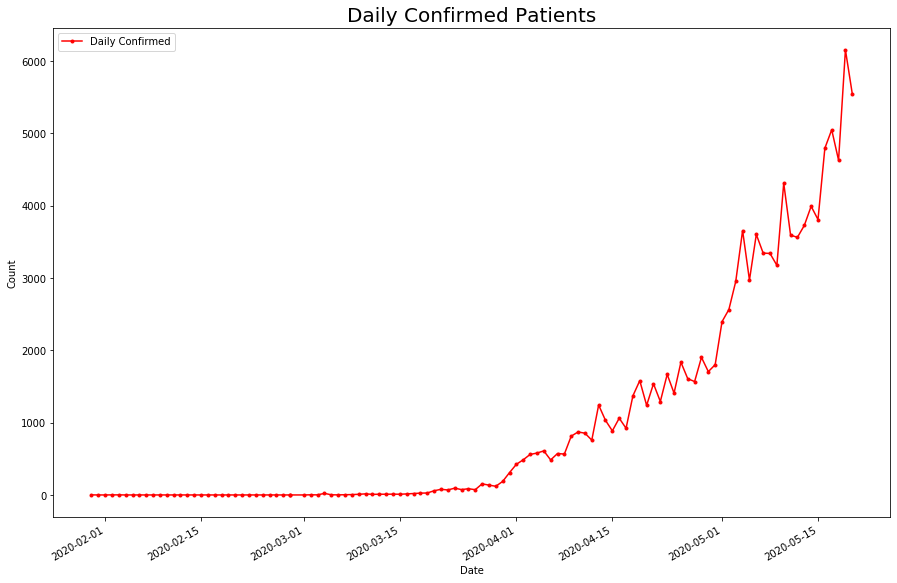

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Confirmed Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Daily Confirmed')

### 10. Analysing the number of Total Confirmed Patients' data

In [46]:
totalconfirmed=df_data[['date','totalconfirmed']]

In [47]:
totalconfirmed.columns=['Date','Count']

In [48]:
totalconfirmed

,Date,Count
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3
...,...,...
107,2020-05-16,90649
108,2020-05-17,95698
109,2020-05-18,100326
110,2020-05-19,106480


### 11.Plotting the Confirmed patients using Line plot

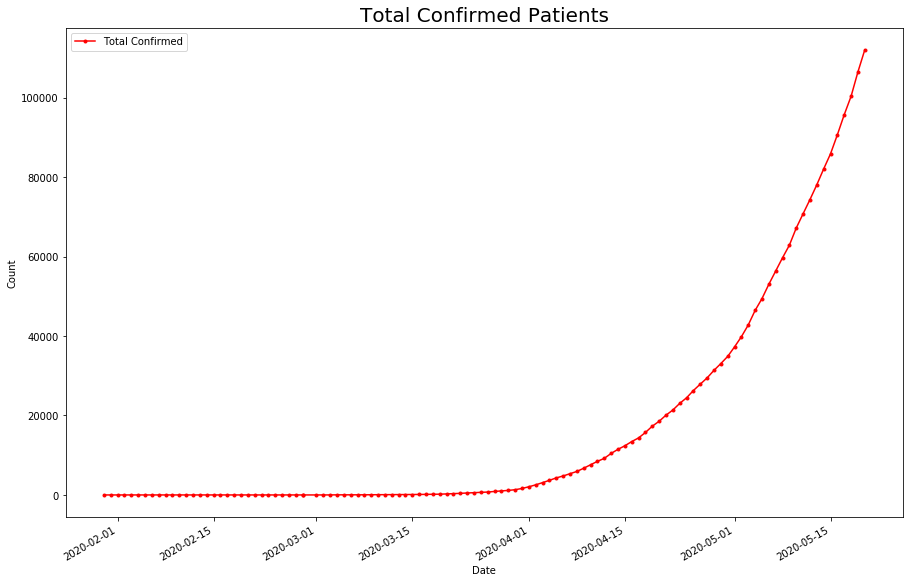

In [78]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Confirmed Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totalconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Total Confirmed')

### 12. Analysing the number of Daily Recovered Patients' data

In [51]:
dailyrecovered=df_data[['date','dailyrecovered']]

In [52]:
dailyrecovered.columns=['Date','Count']

In [53]:
dailyrecovered

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
107,2020-05-16,4012
108,2020-05-17,2538
109,2020-05-18,2482
110,2020-05-19,3032


### 13. Plotting the daily recovered using Line plot

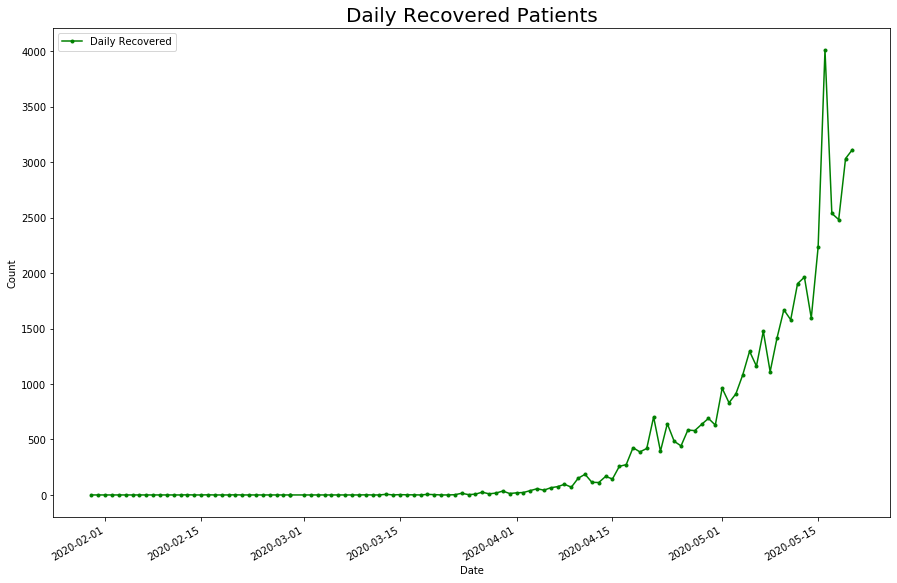

In [82]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Recovered Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Daily Recovered')

### 14. Analysing the number of Total Recovered Patients' data

In [83]:
totalrecovered=df_data[['date','totalrecovered']]

In [84]:
totalrecovered.columns=['Date','Count']

In [85]:
totalrecovered

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
107,2020-05-16,34257
108,2020-05-17,36795
109,2020-05-18,39277
110,2020-05-19,42309


### 15.Plotting the values on Line and Bar plots

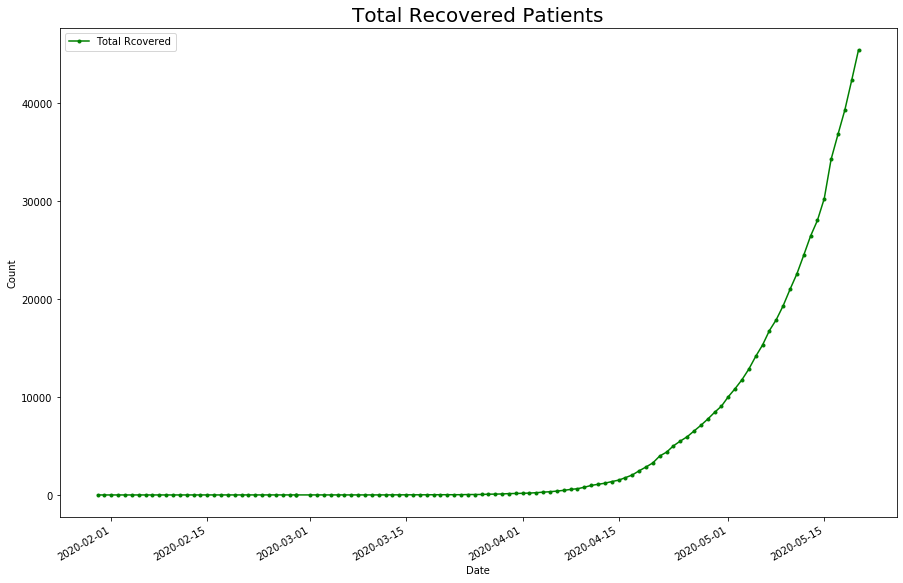

In [87]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Recovered Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totalrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Total Rcovered')

### 16. Analysing the number of Daily Deceased Patients' data

In [88]:
dailydeceased=df_data[['date','dailydeceased']]

In [89]:
dailydeceased.columns=['Date','Count']

In [63]:
dailydeceased

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
107,2020-05-16,120
108,2020-05-17,152
109,2020-05-18,131
110,2020-05-19,146


### 17. Plotting the Daily deceased using Line plot

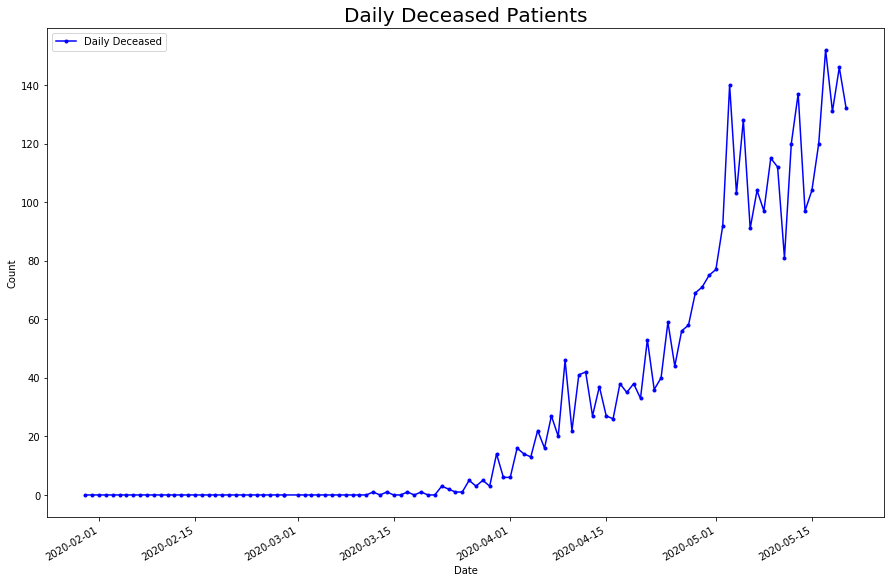

In [91]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Deceased Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailydeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Daily Deceased')

### 18.  Analysing the number of Total Deceased Patients' data

In [92]:
totaldeceased=df_data[['date','totaldeceased']]

In [93]:
totaldeceased.columns=['Date','Count']

In [94]:
totaldeceased

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
107,2020-05-16,2872
108,2020-05-17,3024
109,2020-05-18,3155
110,2020-05-19,3301


### 19. Plotting the Total Deceased using Line plot

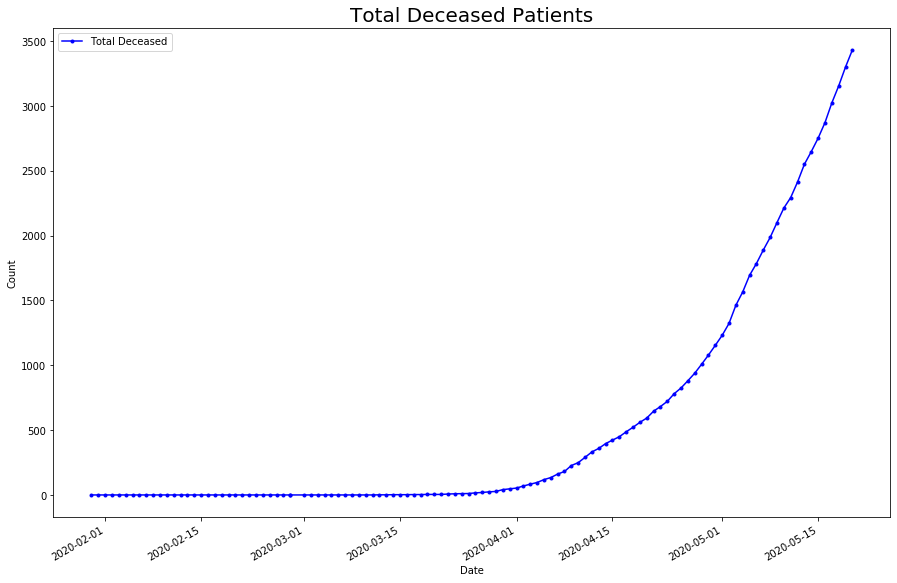

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Deceased Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totaldeceased.plot(kind='line', x='Date', y='Count', color='blue'
                   ,marker='.', ax=ax,label='Total Deceased')

### 20.  Daily Data Plots

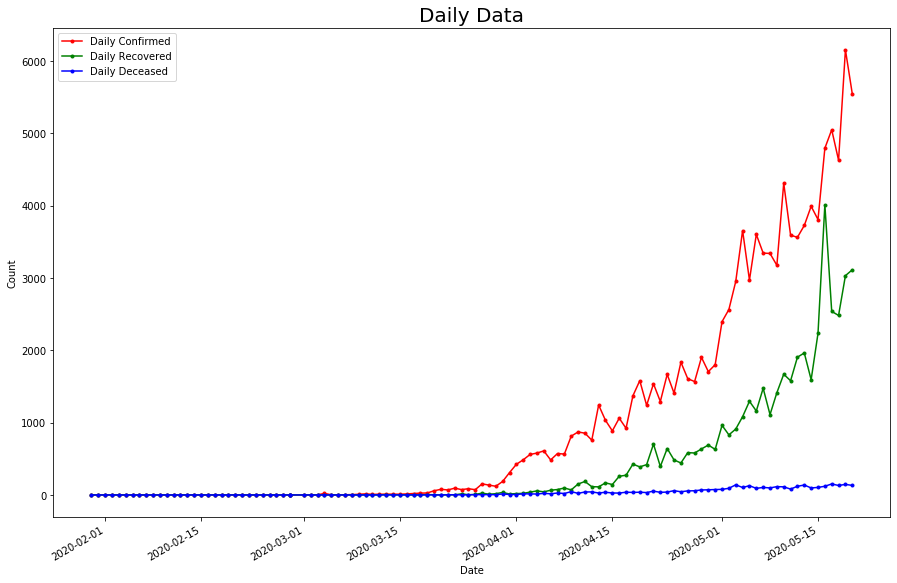

In [97]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Data',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Daily Confirmed')
dailyrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Daily Recovered')
dailydeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Daily Deceased')

### 21. Combined Total Data Plots

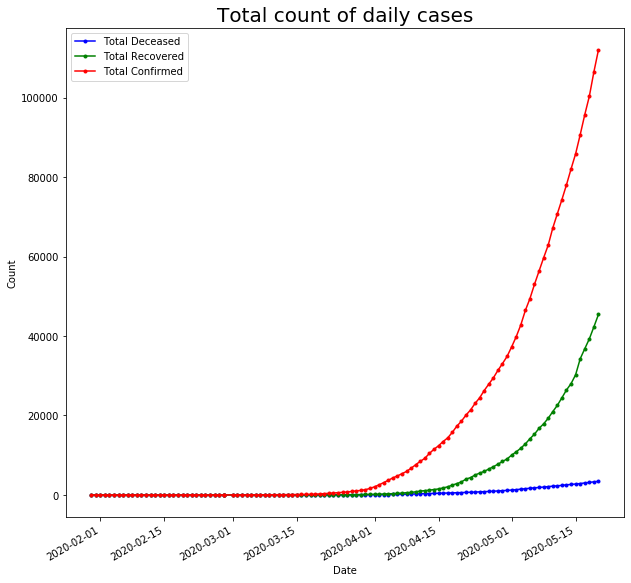

In [100]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Total count of daily cases',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totaldeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Total Deceased')
totalrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Total Recovered')
totalconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Total Confirmed')

### 22. Pair-plot based on month 

In [136]:
month = []
for i in range(len(df_data)):
    month.append(df_data.date[i].month)

In [138]:
df_data['month'] = month

In [139]:
df_data['month'] = month
for i,r in df_data.iterrows():
    if df_data.iloc[i,7]==1:
        df_data.iloc[i,7]='Jan'
    if df_data.iloc[i,7]==2:
        df_data.iloc[i,7]='Feb'
    if df_data.iloc[i,7]==3:
        df_data.iloc[i,7]='Mar'
    if df_data.iloc[i,7]==4:
        df_data.iloc[i,7]='Apr'
    if df_data.iloc[i,7]==5:
        df_data.iloc[i,7]='May'

/home/chiranjeevi_karthik/anaconda3/envs/karthik/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/chiranjeevi_karthik/anaconda3/envs/karthik/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/chiranjeevi_karthik/anaconda3/envs/karthik/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/chiranjeevi_karthik/anaconda3/envs/karthik/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/chiranjeevi_karthik/anaconda3/envs/karthik/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidt

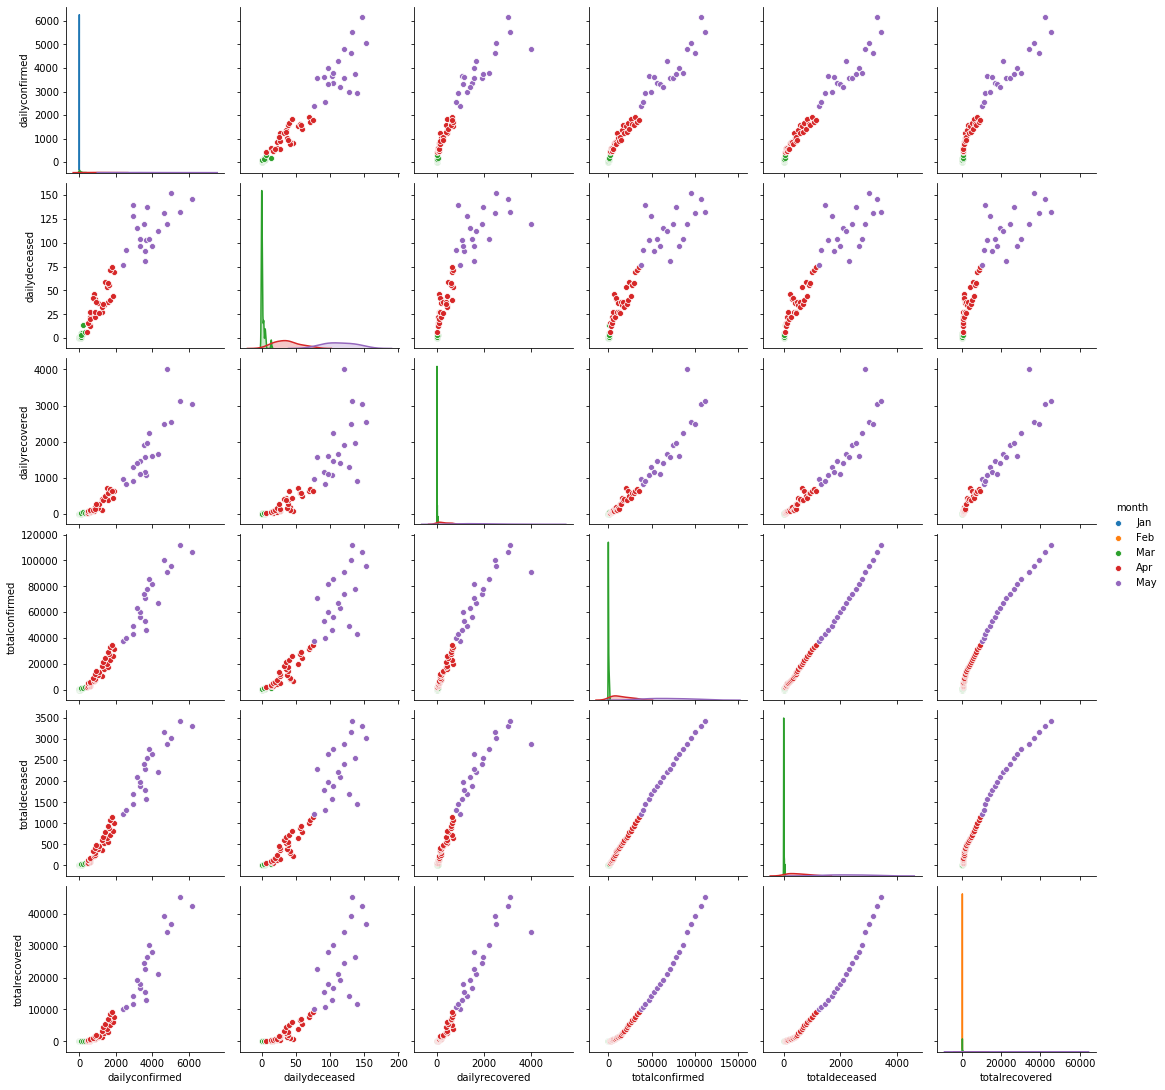

In [141]:
sns.pairplot(data= df_data,hue="month")